In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'eniac_data/'
orderlines = pd.read_csv(path + 'orderlines_cl.csv')
orders = pd.read_csv(path + 'orders_cl.csv')
brands = pd.read_csv(path + 'brands_cl.csv')
products = pd.read_csv(path + 'products_cl.csv')

In [3]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [4]:
orders_compl = orders.query('state == "Completed"')

In [5]:
orderlines = orderlines.drop(columns={'product_id', 'check_orders'})

In [6]:
orderlines_compl = orderlines.loc[orderlines['id_order'].isin(orders_compl['order_id'])].reset_index().copy()

In [7]:
orderlines_compl = orderlines_compl.drop(columns={'index', 'id'})

#### List of products sold more than 20000 times:

In [8]:
prod_sold_over_20000_times = (
orderlines_compl
    .groupby(['sku'])
    .agg({'id_order':'count', 'product_quantity':'sum'})
    .reset_index()
    .assign(sold_sku = lambda x: round(x['id_order']*x['product_quantity']))
    .sort_values('sold_sku', ascending=False)
    .reset_index()
    .drop(columns={'index'})
    .head(41)
)
prod_sold_over_20000_times

,sku,id_order,product_quantity,sold_sku
0,APP1190,932,1021,951572
1,APP0698,493,843,415599
2,APP1922,545,573,312285
3,APP0927,383,495,189585
4,WDT0183,309,528,163152
5,SAM0074,325,358,116350
6,CRU0051,298,360,107280
7,APP1214,268,287,76916
8,APP2446,262,272,71264
9,NTE0013,224,293,65632


In [9]:
(
orderlines_compl
    .merge(prod_sold_over_20000_times, how='right', left_on='sku', right_on='sku')
)

,id_order_x,product_quantity_x,sku,unit_price,date,total_price,id_order_y,product_quantity_y,sold_sku
0,301173,1,APP1190,58.99,2017-01-02 23:46:35,58.99,932,1021,951572
1,301322,1,APP1190,58.99,2017-01-03 09:34:02,58.99,932,1021,951572
2,301504,1,APP1190,58.99,2017-01-03 12:14:35,58.99,932,1021,951572
3,301695,1,APP1190,58.99,2017-01-03 14:59:37,58.99,932,1021,951572
4,303339,1,APP1190,52.99,2017-01-05 19:14:29,52.99,932,1021,951572
...,...,...,...,...,...,...,...,...,...
9346,506369,1,NEA0009,160.99,2018-02-05 17:35:25,160.99,141,148,20868
9347,510783,1,NEA0009,160.99,2018-02-13 16:25:48,160.99,141,148,20868
9348,518000,1,NEA0009,168.99,2018-02-26 23:30:07,168.99,141,148,20868
9349,520640,1,NEA0009,168.99,2018-03-03 19:28:27,168.99,141,148,20868


In [10]:
ol_compl_with_sku_from_pso20000 = (
orderlines_compl
    .merge(prod_sold_over_20000_times, how='right', left_on='sku', right_on='sku')
    .merge(products, how='inner', left_on='sku', right_on='sku')
    .assign(short = lambda x: x['sku'].str[:3])
    .merge(brands, how='left', left_on='short', right_on='short')
    .rename(columns={'long':'brand'})
    .filter(['sku', 'total_price', 'price', 'sold_sku', 'unit_price', 'name', 'brand'])
)

#### List of products sold more than 20000 times with the name, brand, revenue and discount:

In [11]:
ol_compl_with_sku_from_pso20000_disc = (
ol_compl_with_sku_from_pso20000
    .groupby(['sku', 'sold_sku', 'name', 'brand'])
    .agg({'total_price': 'mean', 'price':'mean', 'unit_price':'mean'})
    .assign(disc_perc = lambda x: round((1 - x['unit_price'] / x['price'])*100))
    .sort_values('sold_sku', ascending=False)
    .dropna()
    .reset_index()
)
ol_compl_with_sku_from_pso20000_disc

,sku,sold_sku,name,brand,total_price,price,unit_price,disc_perc
0,APP1190,951572,IPhone AppleCare Protection Plan,Apple,59.674421,70.00,54.505944,22.0
1,APP0698,415599,Apple Lightning Cable Connector to USB 1m Whit...,Apple,17.026917,25.00,9.965903,60.0
2,APP1922,312285,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple,168.623706,179.00,160.399853,10.0
3,APP0927,189585,EarPods Apple Headphones with Remote and Mic (...,Apple,22.065039,35.00,17.150157,51.0
4,WDT0183,163152,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital,235.161294,169.00,137.596343,19.0
5,SAM0074,116350,Samsung 850 EVO SSD Disk 500GB,Samsung,167.668769,179.99,152.296062,15.0
6,CRU0051,107280,Crucial MX300 525GB SSD Disk,Crucial,163.083456,158.66,135.541074,15.0
7,APP1214,76916,Apple Magic Mouse 2,Apple,86.815299,89.00,81.056455,9.0
8,APP2446,71264,Apple iPhone 6 32GB Space Gray,Apple,402.026183,449.33,387.269885,14.0
9,NTE0013,65632,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",NewerTech,23.790179,26.99,19.361205,28.0


In [48]:
ol_compl_with_sku_from_pso20000_dis_total = (
ol_compl_with_sku_from_pso20000_disc
    .assign(total_per_sku_mil = lambda x: round((x['sold_sku']*x['total_price']/1000000),2))
    .assign(sold_sku_k = lambda x: round(x['sold_sku']/1000))
)
ol_compl_with_sku_from_pso20000_dis_total['sold_sku_k_int'] = ol_compl_with_sku_from_pso20000_dis_total['sold_sku_k'].astype('int32')

In [68]:
(
ol_compl_with_sku_from_pso20000_dis_total
    .filter(['sku', 'sold_sku_k', 'name', 'brand', 'disc_perc', 'total_price', 'total_per_sku_mil', 'sold_sku_k_int'])
    .sort_values('total_per_sku_mil', ascending=False)
)

,sku,sold_sku_k,name,brand,disc_perc,total_price,total_per_sku_mil,sold_sku_k_int
0,APP1190,952.0,IPhone AppleCare Protection Plan,Apple,22.0,59.674421,56.78,952
2,APP1922,312.0,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple,10.0,168.623706,52.66,312
4,WDT0183,163.0,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital,19.0,235.161294,38.37,163
12,LGE0044,52.0,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",LG,5.0,671.159282,34.79,52
8,APP2446,71.0,Apple iPhone 6 32GB Space Gray,Apple,14.0,402.026183,28.65,71
5,SAM0074,116.0,Samsung 850 EVO SSD Disk 500GB,Samsung,15.0,167.668769,19.51,116
11,APP1970,53.0,Apple iPhone 32GB Space Gray,Apple,14.0,366.745371,19.48,53
6,CRU0051,107.0,Crucial MX300 525GB SSD Disk,Crucial,15.0,163.083456,17.50,107
36,WDT0318,22.0,"WD Red 8TB 35 ""Mac PC hard drive and NAS",Western Digital,25.0,440.508696,9.57,22
35,WDT0249,22.0,"WD Red 6TB 35 ""Mac PC hard drive and NAS",Western Digital,16.0,361.470348,7.98,22


In [32]:
ol_compl_with_sku_from_pso20000_dis_total.agg({'disc_perc':'mean'})

disc_perc    22.675
dtype: float64

#### Plot for showing a Relation between sold products and the discount

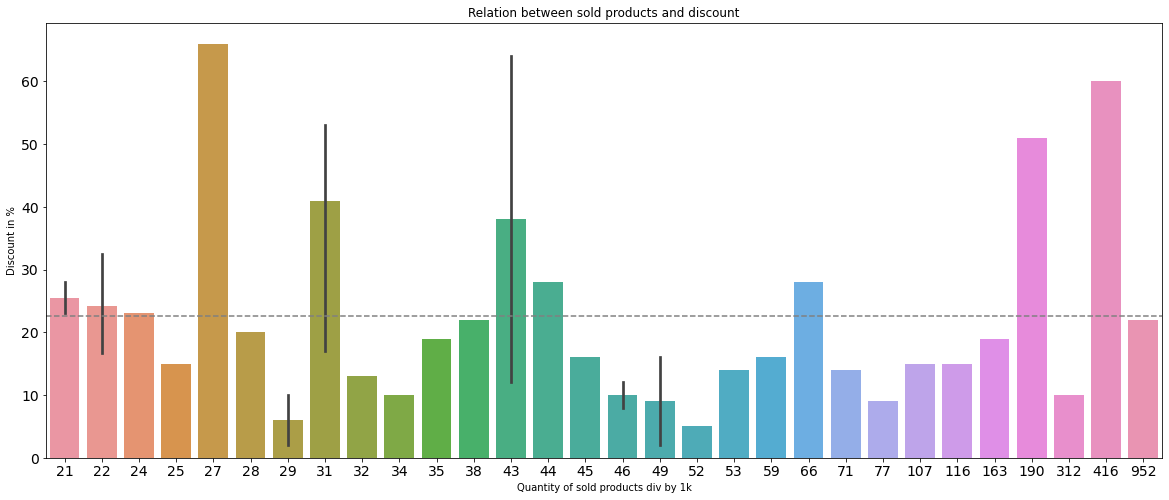

In [52]:
plt.subplots(figsize=(20, 8))


p = sns.barplot(
    data=ol_compl_with_sku_from_pso20000_dis_total,
    x='sold_sku_k_int',
    y='disc_perc', # y values on our chart
#     hue='year', # group color in our chart
#     order=months # order x columns
)

p.axhline(
    ol_compl_with_sku_from_pso20000_dis_total['disc_perc'].mean(),
    linestyle='--',
    color='gray'
)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Quantity of sold products div by 1k')
plt.ylabel('Discount in %')
plt.title('Relation between sold products and discount')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Plot for showing the relation between discount, price and quantity of the sold products:

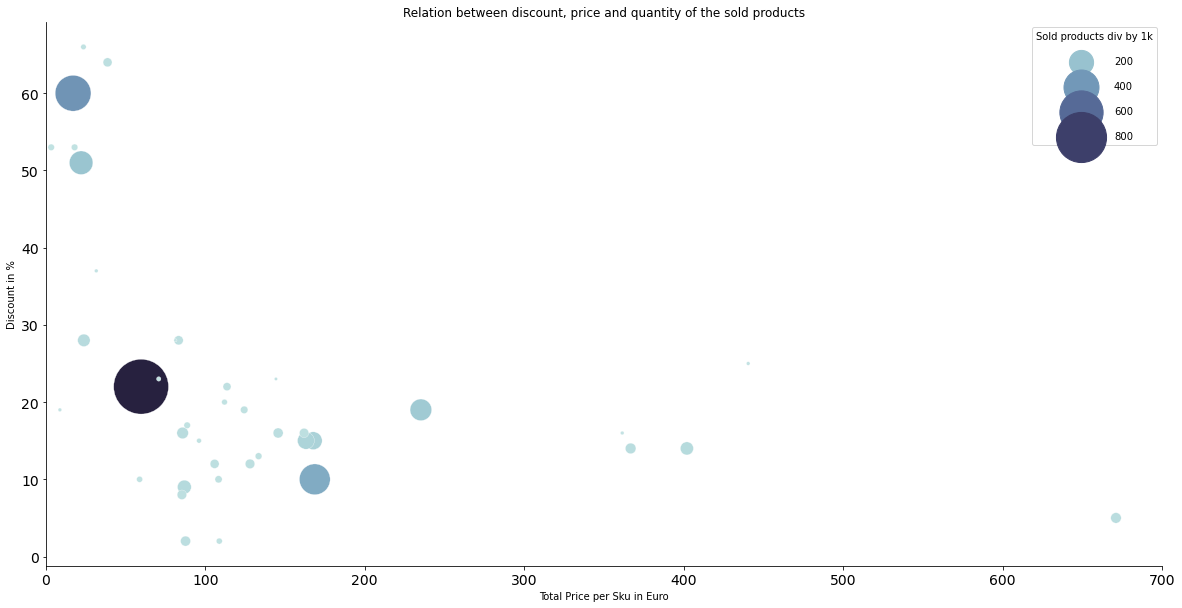

In [54]:
plt.subplots(figsize=(20, 10))

sc = sns.scatterplot(data=ol_compl_with_sku_from_pso20000_dis_total, x='total_price', y='disc_perc',
                hue='sold_sku_k', 
                size='sold_sku_k',
                sizes=(10, 3000),
                palette='ch:start=.2,rot=-.3',
                legend='brief')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Total Price per Sku in Euro')
plt.ylabel('Discount in %')
plt.title('Relation between discount, price and quantity of the sold products')
plt.legend(handlelength=5, labelspacing=1.5, prop={'size': 10}, loc="upper right", numpoints=10, title_fontsize=10, title = 'Sold products div by 1k')
plt.xlim(0, 700)
sns.despine()
plt.show()

##### second plot for the same:

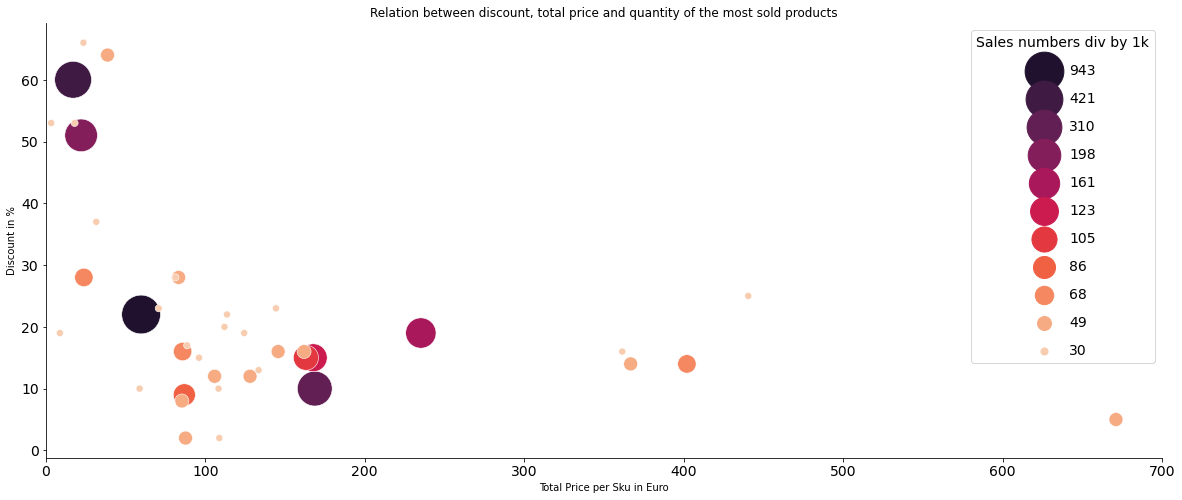

In [67]:
import numpy as np

p_df = (
ol_compl_with_sku_from_pso20000_dis_total
    .assign(sold_sku_k_cat = lambda x: pd.cut(x['sold_sku_k_int'], bins=50))
    .assign(min_bin = lambda x: x['sold_sku_k_cat'])
)
p_df = (
p_df
    .assign(left_interval = [cat.left for cat in p_df['sold_sku_k_cat']], 
            right_interval = [cat.right for cat in p_df['sold_sku_k_cat']])
    .assign(mean_interval = lambda x: x[['left_interval','right_interval']].mean(axis=1))
    .assign(mean_interval_cat = lambda x: (round(x['mean_interval'],0).astype('int')).astype('str'))
)
p_df['mean_interval'].unique()

plt.subplots(figsize=(20, 8))

sc = sns.scatterplot(
    data=p_df, 
    x='total_price', y='disc_perc', 
    hue='mean_interval_cat', 
    size='mean_interval_cat',
    sizes=(50, 1500),
    palette="rocket") #'ch:start=.2,rot=-.3'

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Total Price per Sku in Euro')
plt.ylabel('Discount in %')
plt.title('Relation between discount, total price and quantity of the most sold products')
plt.legend(handlelength=2, labelspacing=1, prop={'size': 14}, 
           loc="upper right", numpoints=5, title_fontsize=14, 
           title = 'Sales numbers div by 1k')
plt.xlim(0, 700)
sns.despine()
plt.show()


#### Plot for showing the relation between discount, revenue and quantity of the sold products:

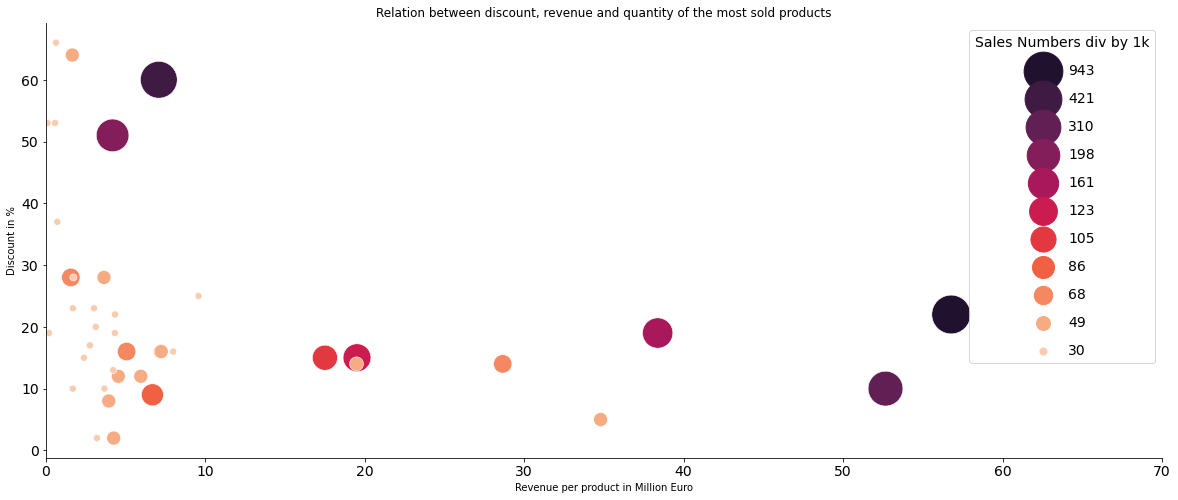

In [70]:
import numpy as np

p_df = (
ol_compl_with_sku_from_pso20000_dis_total
    .assign(sold_sku_k_cat = lambda x: pd.cut(x['sold_sku_k_int'], bins=50))
    .assign(min_bin = lambda x: x['sold_sku_k_cat'])
)
p_df = (
p_df
    .assign(left_interval = [cat.left for cat in p_df['sold_sku_k_cat']], 
            right_interval = [cat.right for cat in p_df['sold_sku_k_cat']])
    .assign(mean_interval = lambda x: x[['left_interval','right_interval']].mean(axis=1))
    .assign(mean_interval_cat = lambda x: (round(x['mean_interval'],0).astype('int')).astype('str'))
)
p_df['mean_interval'].unique()

plt.subplots(figsize=(20, 8))

sc = sns.scatterplot(
    data=p_df, 
    x='total_per_sku_mil', y='disc_perc', 
    hue='mean_interval_cat', 
    size='mean_interval_cat',
    sizes=(50, 1500),
    palette="rocket") #'ch:start=.2,rot=-.3'

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Revenue per product in Million Euro')
plt.ylabel('Discount in %')
plt.title('Relation between discount, revenue and quantity of the most sold products')
plt.legend(handlelength=2, labelspacing=1, prop={'size': 14}, 
           loc="upper right", numpoints=5, title_fontsize=14, 
           title = 'Sales Numbers div by 1k')
plt.xlim(0, 70)
sns.despine()
plt.show()
